# Zbiór danych agencji Reuters

#### Ładowanie zbioru danych

In [3]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [5]:
print("Przypadki treningowe: {}".format(len(train_data)))
print("Przypadki testowe: {}".format(len(test_data)))

Przypadki treningowe: 8982
Przypadki testowe: 2246


In [7]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [8]:
train_labels[10]

3

#### Dekodowanie indeksów

In [58]:
import pandas as pd

In [61]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ''.join([reverse_word_index.get(i - 3,'?') for i in train_data[10]])

In [44]:
pd.DataFrame(word_index.items(), columns = ('Word', 'Index')).sort_values('Index')

,Word,Index
9876,the,1
14383,of,2
16320,to,3
11819,in,4
27243,said,5
...,...,...
30960,recirculation,30975
30967,capco,30976
30968,figueras,30977
30972,jung,30978


In [57]:
pd.DataFrame(reverse_word_index.items(), columns = ('Index', 'Words')).sort_values('Index')

,Index,Words
9876,1,the
14383,2,of
16320,3,to
11819,4,in
27243,5,said
...,...,...
30960,30975,recirculation
30967,30976,capco
30968,30977,figueras
30972,30978,jung


In [62]:
decoded_newswire

'?periodendeddecember31shrprofit11ctsvsloss24ctsnetprofit224271vsloss511349revs7258688vs7200349reuter3'

#### Przygotowanie danych

In [78]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [67]:
## Stworzenie macierzy zerowej o rozmiarze liczby obserwacji (artykulow) vs liczbie wszytskich slow
np.zeros((len(train_data), 10000)).shape

(8982, 10000)

In [85]:
## Zapisanie do results wystepowania danego slowa w danym artykule. Jesli wystepowalo to 1 jeslie nie to pozostaje 0
for i, sequence in enumerate(train_data[1:3]):
    print(i, sequence)

0 [1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]
1 [1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110, 59, 89, 90, 67, 1390, 55, 2678, 92, 617, 80, 1274, 46, 905, 220, 13, 4, 346, 48, 235, 629, 5, 211, 5, 1118, 7, 2, 81, 5, 187, 11, 15, 9, 1709, 201, 5, 47, 3615, 18, 478, 4514, 5, 1118, 7, 232, 2, 71, 5, 160, 63, 11, 9, 2, 81, 5, 102, 59, 11, 17, 12]


In [86]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [89]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [92]:
one_hot_train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Budowa modelu

#### Definicja modelu

In [96]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

#### Kompilacja modelu

In [97]:
model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

## Walidacja modelu

#### Tworzenie zbioru kontrolnego

In [100]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

#### Treniowanie modelu

In [101]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 259us/sample - loss: 2.5376 - accuracy: 0.5019 - val_loss: 1.7192 - val_accuracy: 0.6580
Epoch 2/20
7982/7982 [==============================] - 1s 148us/sample - loss: 1.4090 - accuracy: 0.7045 - val_loss: 1.3024 - val_accuracy: 0.7080
Epoch 3/20
7982/7982 [==============================] - 1s 147us/sample - loss: 1.0405 - accuracy: 0.7756 - val_loss: 1.1394 - val_accuracy: 0.7450
Epoch 4/20
7982/7982 [==============================] - 1s 149us/sample - loss: 0.8144 - accuracy: 0.8257 - val_loss: 1.0192 - val_accuracy: 0.7900
Epoch 5/20
7982/7982 [==============================] - 1s 140us/sample - loss: 0.6478 - accuracy: 0.8626 - val_loss: 0.9969 - val_accuracy: 0.7870
Epoch 6/20
7982/7982 [==============================] - 1s 137us/sample - loss: 0.5199 - accuracy: 0.8921 - val_loss: 0.9448 - val_accuracy: 0.8030
Epoch 7/20
7982/7982 [==============================] - 1s 138us

## Strata trenowania i walidacji

In [102]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

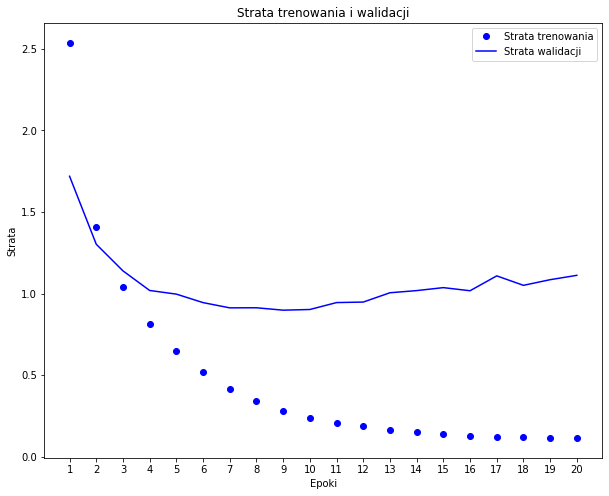

In [103]:
plt.figure(figsize = (10, 8))

plt.plot(epochs, loss, 'bo', label = 'Strata trenowania')
plt.plot(epochs, val_loss, 'b', label = 'Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.xlabel('Epoki')
plt.xticks(np.arange(1, 21))
plt.ylabel('Strata')
plt.legend()

plt.show()

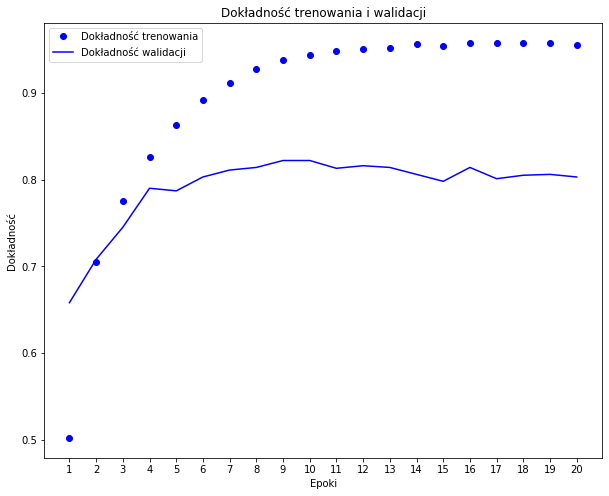

In [104]:
plt.figure(figsize = (10, 8))

plt.plot(epochs, acc, 'bo', label = 'Dokładność trenowania')
plt.plot(epochs, val_acc, 'b', label = 'Dokładność walidacji')
plt.title('Dokładność trenowania i walidacji')
plt.xlabel('Epoki')
plt.xticks(np.arange(1, 21))
plt.ylabel('Dokładność')
plt.legend()

plt.show()

## Ponowne uczenie sieci

In [105]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=9,
                   batch_size = 512,
                   validation_data = (x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)
results

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 2s 259us/sample - loss: 2.8841 - accuracy: 0.5066 - val_loss: 1.8825 - val_accuracy: 0.6380
Epoch 2/9
7982/7982 [==============================] - 1s 156us/sample - loss: 1.4755 - accuracy: 0.7063 - val_loss: 1.3533 - val_accuracy: 0.7130
Epoch 3/9
7982/7982 [==============================] - 1s 159us/sample - loss: 1.0620 - accuracy: 0.7770 - val_loss: 1.1656 - val_accuracy: 0.7450
Epoch 4/9
7982/7982 [==============================] - 1s 158us/sample - loss: 0.8324 - accuracy: 0.8231 - val_loss: 1.0568 - val_accuracy: 0.7770
Epoch 5/9
7982/7982 [==============================] - 1s 160us/sample - loss: 0.6664 - accuracy: 0.8579 - val_loss: 0.9823 - val_accuracy: 0.8020
Epoch 6/9
7982/7982 [==============================] - 1s 154us/sample - loss: 0.5332 - accuracy: 0.8871 - val_loss: 0.9413 - val_accuracy: 0.8020
Epoch 7/9
7982/7982 [==============================] - 1s 152us/sample

[1.0060983133018813, 0.78272486]

## Generowanie przewidywań dotyczących nowych danych

#### Generowanie przewidywań nowych danych

In [106]:
predictions = model.predict(x_test)

In [109]:
predictions[0].shape

(46,)

In [116]:
predictions.round(3)

array([[0.001, 0.001, 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.004, 0.001, ..., 0.   , 0.   , 0.   ],
       [0.   , 0.821, 0.013, ..., 0.001, 0.001, 0.001],
       ...,
       [0.   , 0.001, 0.   , ..., 0.   , 0.   , 0.   ],
       [0.004, 0.126, 0.005, ..., 0.002, 0.   , 0.001],
       [0.   , 0.586, 0.016, ..., 0.   , 0.001, 0.001]], dtype=float32)

In [110]:
np.sum(predictions[0])

1.0000001

In [111]:
np.argmax(predictions[0])

3